# Importing Libraries

In [180]:
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from xgboost import XGBClassifier
pd.set_option("display.max_columns",None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Project 
## Personality Type Prediction Analysis 

In [181]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\personality_synthetic_dataset.csv")

# Data Info

In [182]:
df.head()

personality_type  social_energy  alone_time_preference  talkativeness  \
0        Extrovert       6.794295               3.854670       8.725446   
1         Ambivert       6.378988               5.731157       7.029529   
2         Ambivert       7.459421               6.322263       3.922269   
3        Extrovert       6.159626               3.097837       6.019093   
4        Introvert       5.568462               6.986722       3.913240   

   deep_reflection  group_comfort  party_liking  listening_skill   empathy  \
0         2.515151       7.097368      8.588762         6.774799  6.430132   
1         7.274493       4.111199      3.258248         5.550909  3.958179   
2         4.622261       5.343276      7.452152         9.483990  6.127654   
3         1.965440       7.837140     10.000000         9.436733  8.949684   
4         9.926161       1.650483      0.362298         7.470387  6.756837   

   creativity  organization  leadership  risk_taking  public_speaking_comfort  \
0    6.142968      0.000000    8.486191     6.888588                 8.618033   
1    6.149457      4.530322    6.214742     4.877224                 5.018526   
2    7.032017      7.092078    3.034192     4.312376                 6.474164   
3    8.923875      5.232694   10.000000     8.203100                 7.269755   
4    9.507803      6.378051    4.452973     2.456879                 2.779744   

   curiosity  routine_preference  excitement_seeking  friendliness  \
0   5.514367            4.247436            8.916668      8.370776   
1   6.170892            6.304219            6.494122      9.127521   
2   6.179085            4.930449            4.054730      7.602897   
3   5.477594            2.284054            9.442942     10.000000   
4   5.138220            7.043162            4.149461      4.628954   

   emotional_stability  planning  spontaneity  adventurousness  reading_habit  \
0             4.919931  4.426422     4.853313         8.257134       5.270555   
1             4.585075  4.604019     6.067201         6.289347       5.753165   
2             5.651975  6.269467     5.524244         9.238784       5.250405   
3             6.622884  5.566069     4.327018         8.489791       5.312617   
4             5.283958  4.711944     5.187689         3.167217       7.060235   

   sports_interest  online_social_usage  travel_desire  gadget_usage  \
0        10.000000             9.154296       4.816422      9.191711   
1         5.334303             4.683781       4.725666      5.956141   
2         3.153540             5.000338       6.139166      6.033048   
3         8.379936             7.601946       6.370056      5.410145   
4         2.333388             7.771569       5.534336      5.704598   

   work_style_collaborative  decision_speed  stress_handling  
0                  8.313590        8.032376         7.176905  
1                  5.890619        3.158988         3.423577  
2                  5.807500        4.571003         5.647480  
3                  6.671781        6.600233         5.870088  
4                  5.832968        5.813099         3.758084

In [183]:
df.shape

(20000, 30)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

# Data Handling & Cleaning

In [185]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization 

<Axes: title={'center': 'Pie Classification Of Personality Types'}, ylabel='count'>

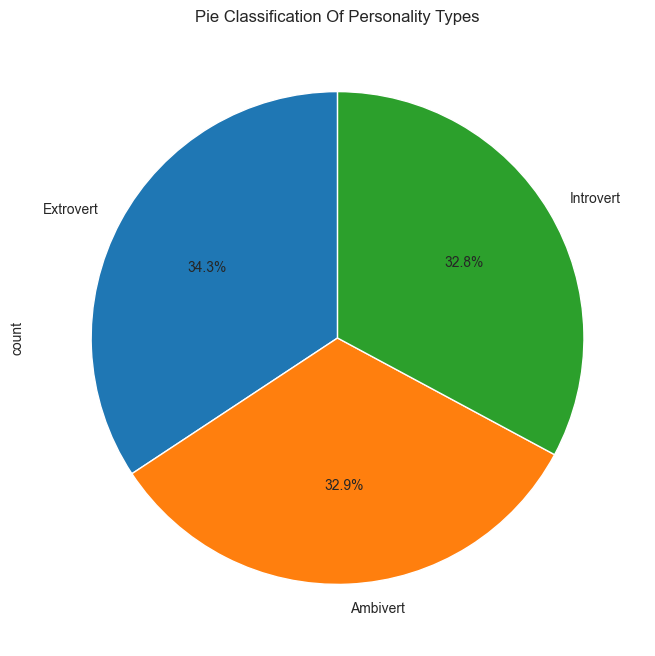

In [186]:
df["personality_type"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(10,8),startangle=90,title="Pie Classification Of Personality Types")

## Average Social Energy Of Different Personality Types

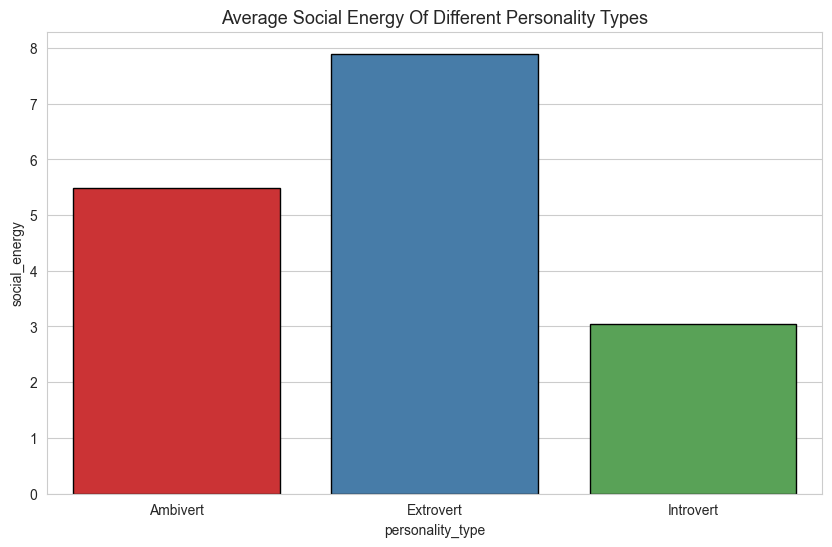

In [187]:
classifi_en=df.groupby("personality_type")["social_energy"].mean().reset_index()
classifi_en
plt.figure(figsize=(10,6))
sns.barplot(data=classifi_en,x="personality_type",y="social_energy",edgecolor="black",palette="Set1")
plt.title("Average Social Energy Of Different Personality Types",size=13)
plt.show()

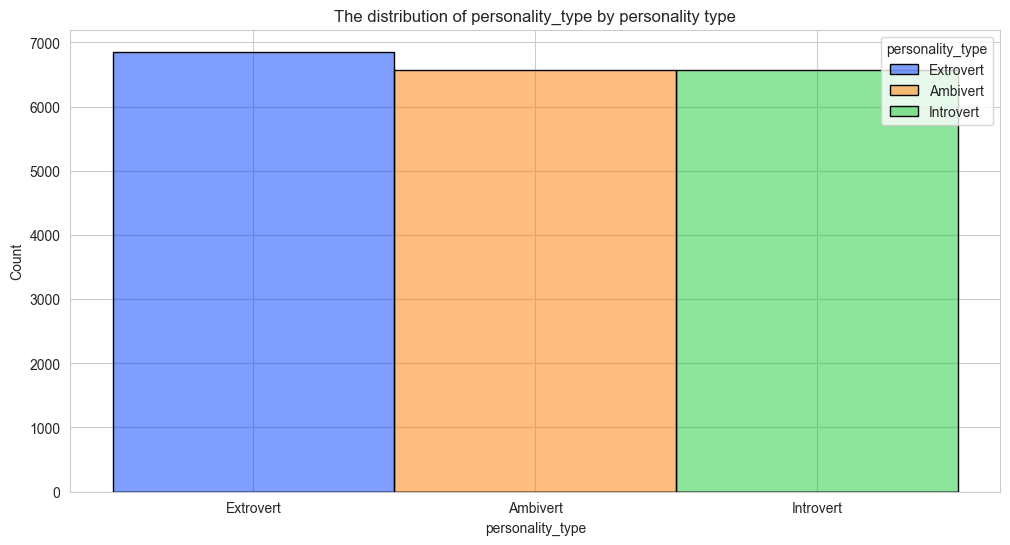

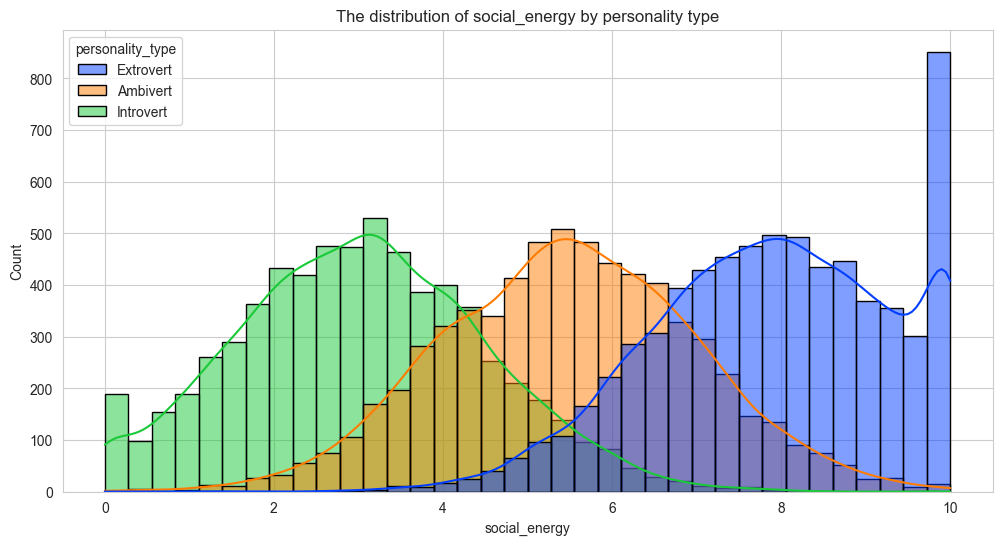

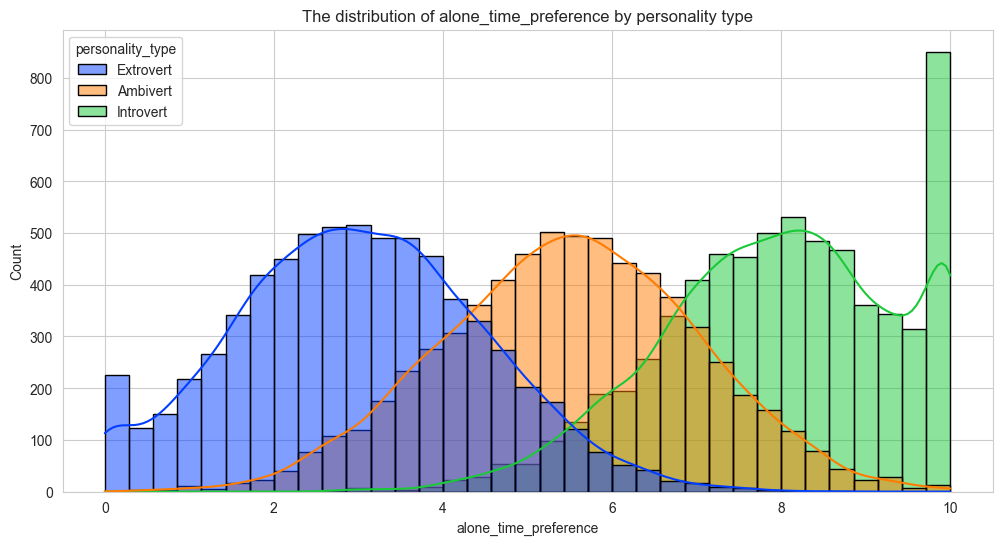

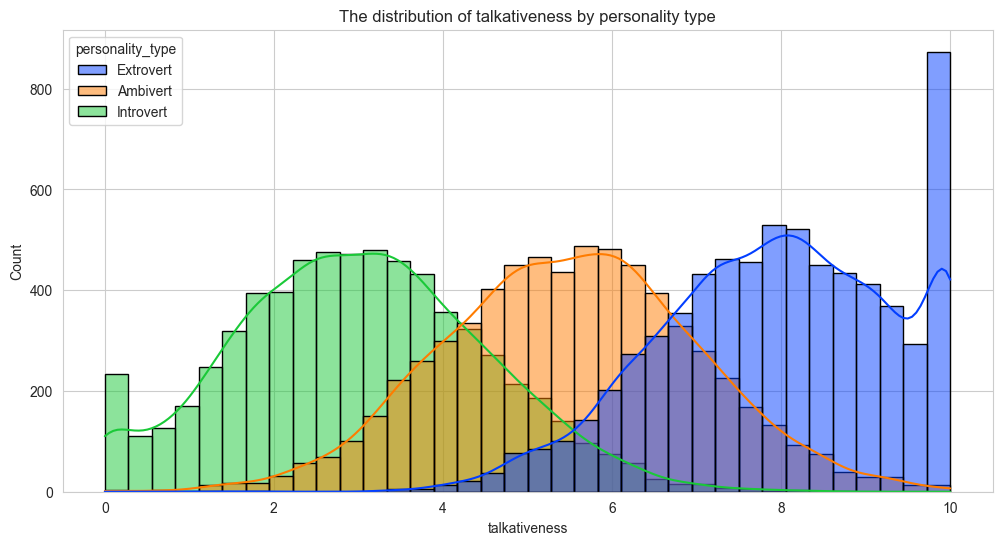

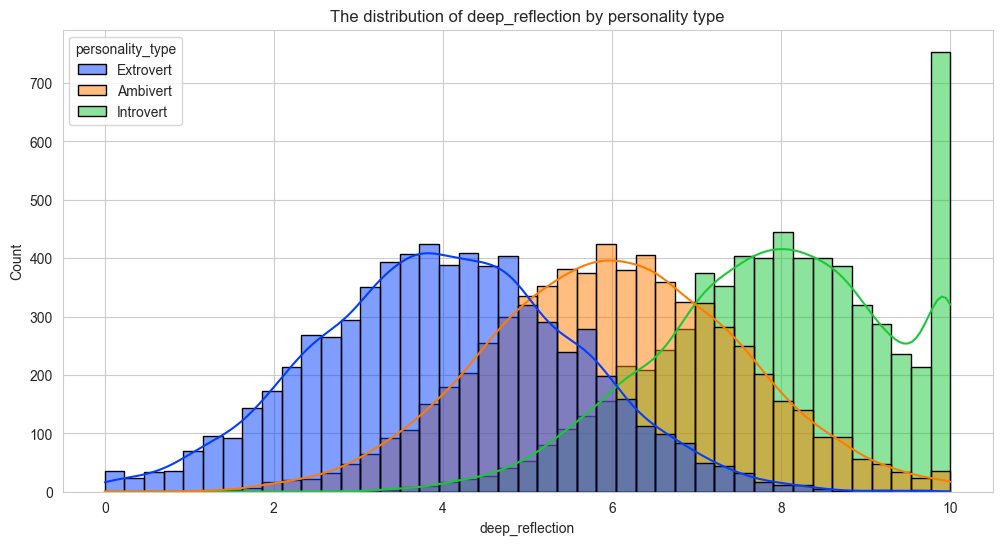

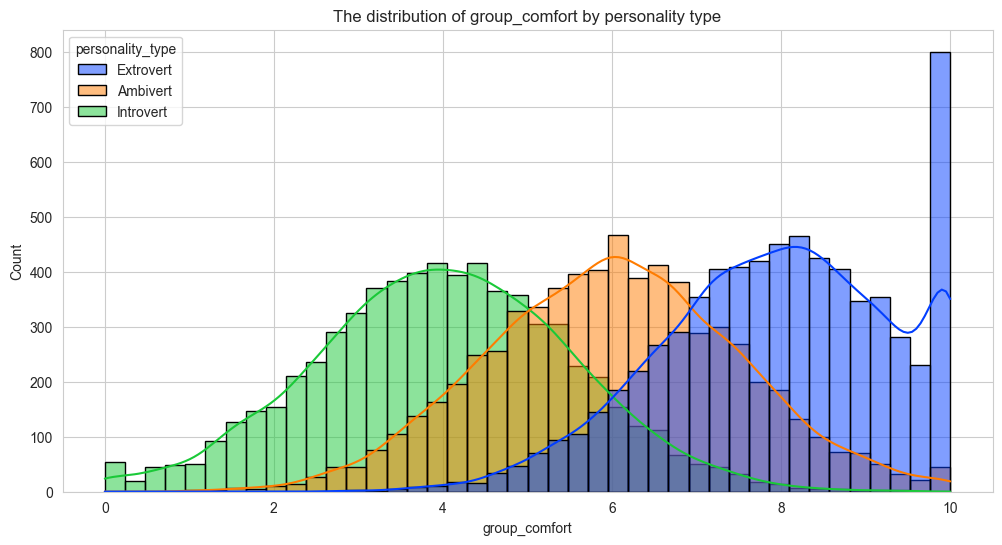

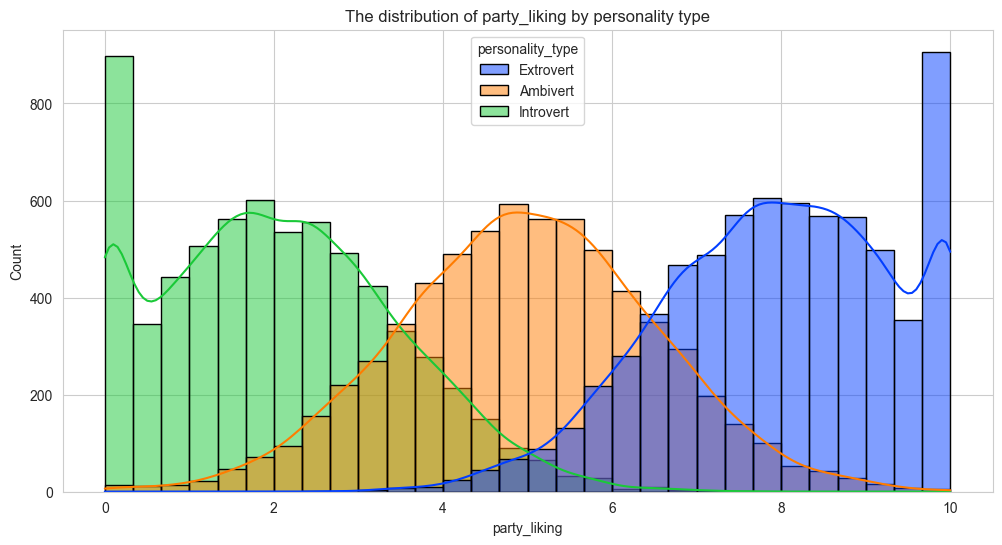

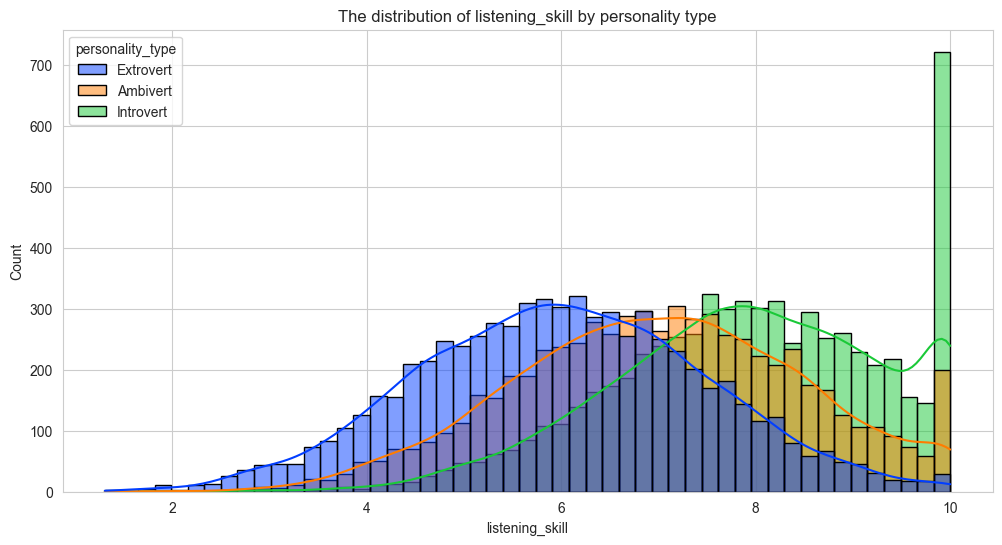

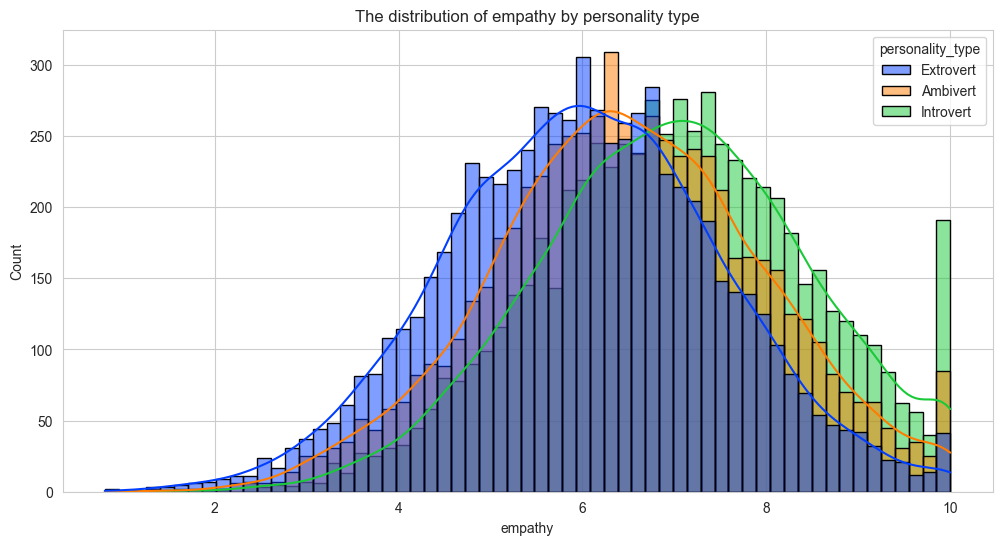

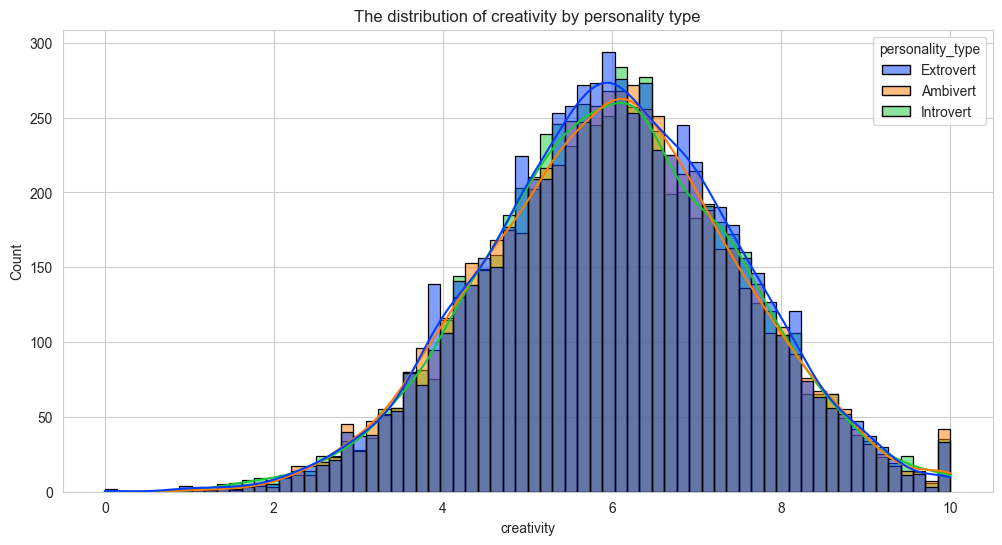

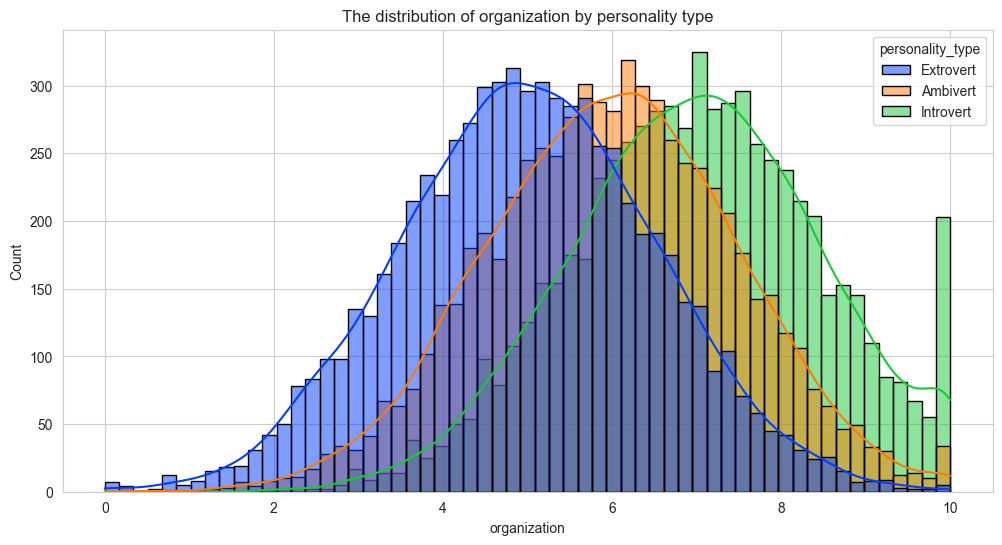

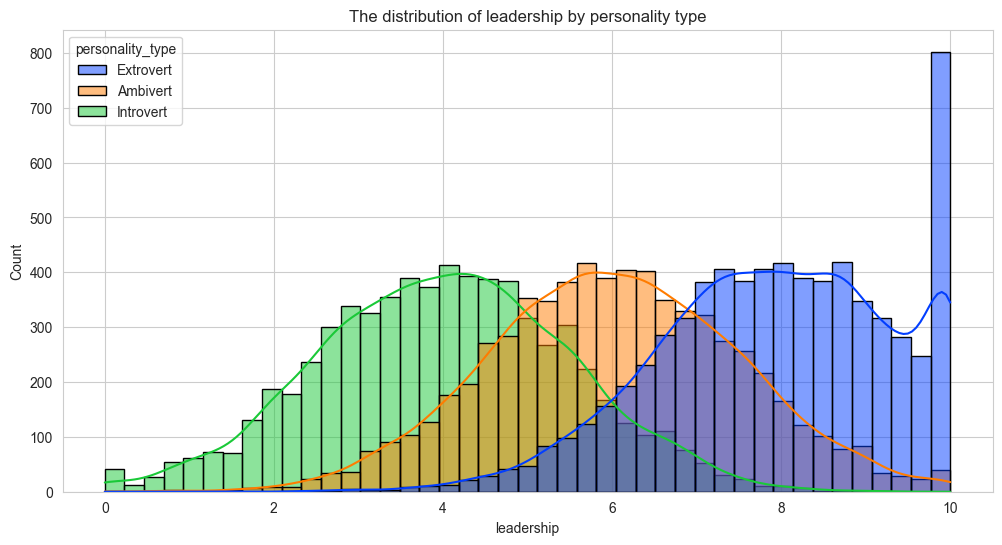

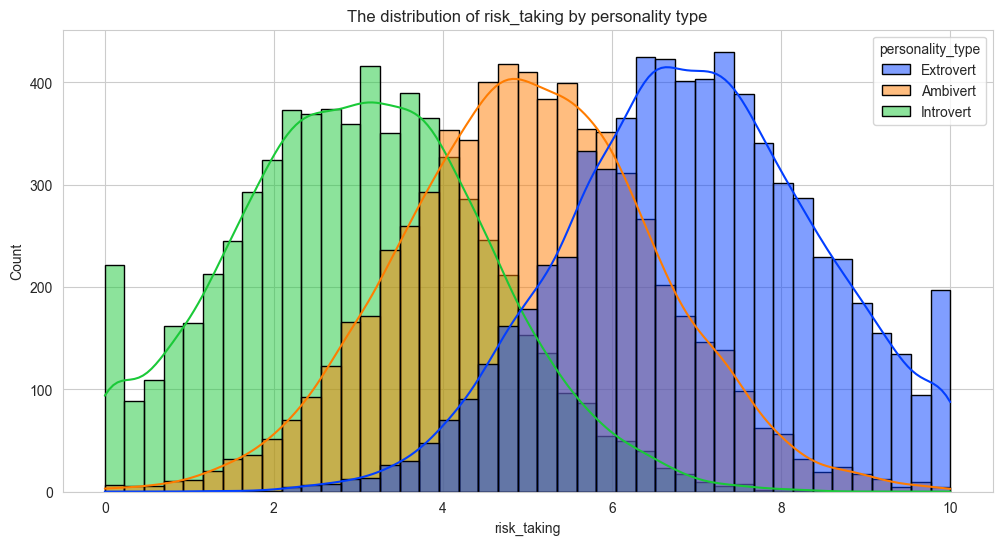

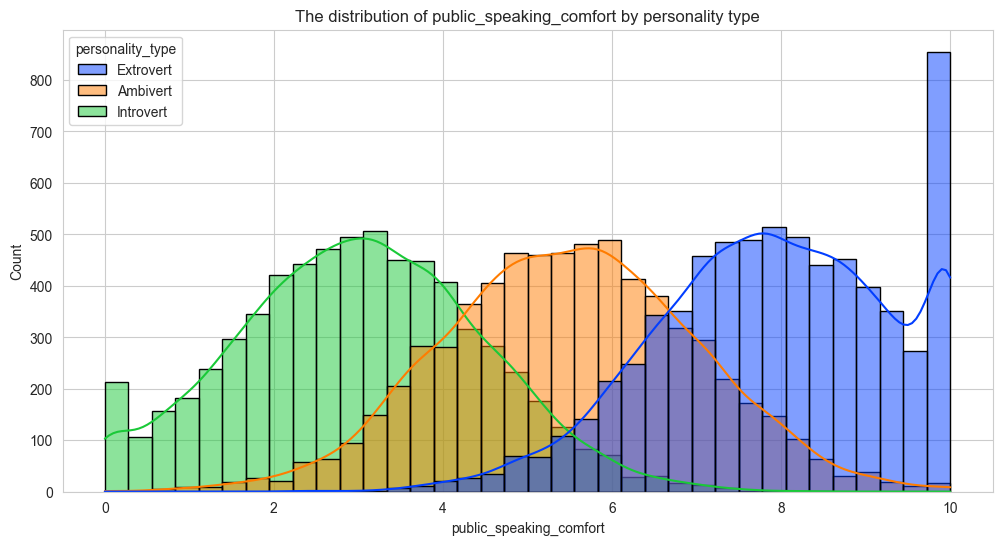

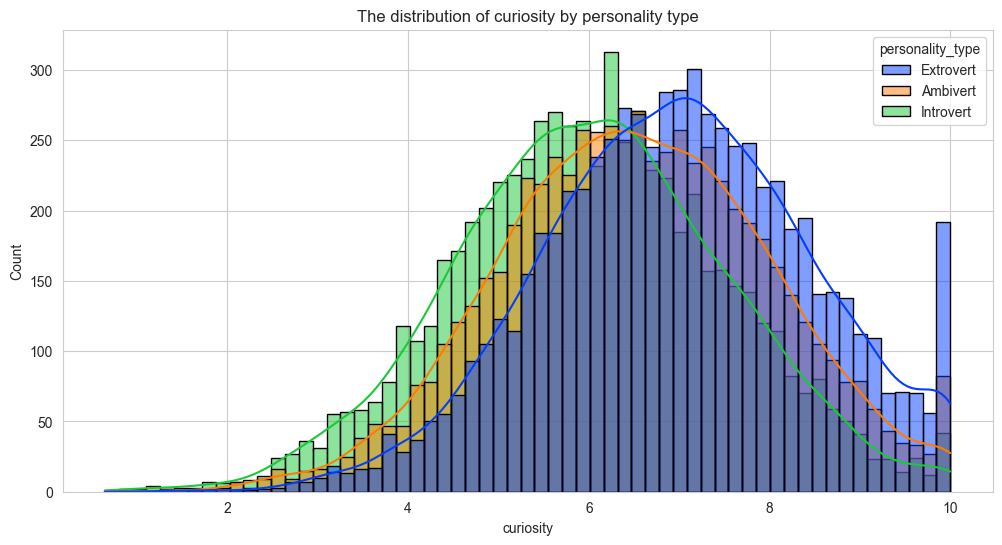

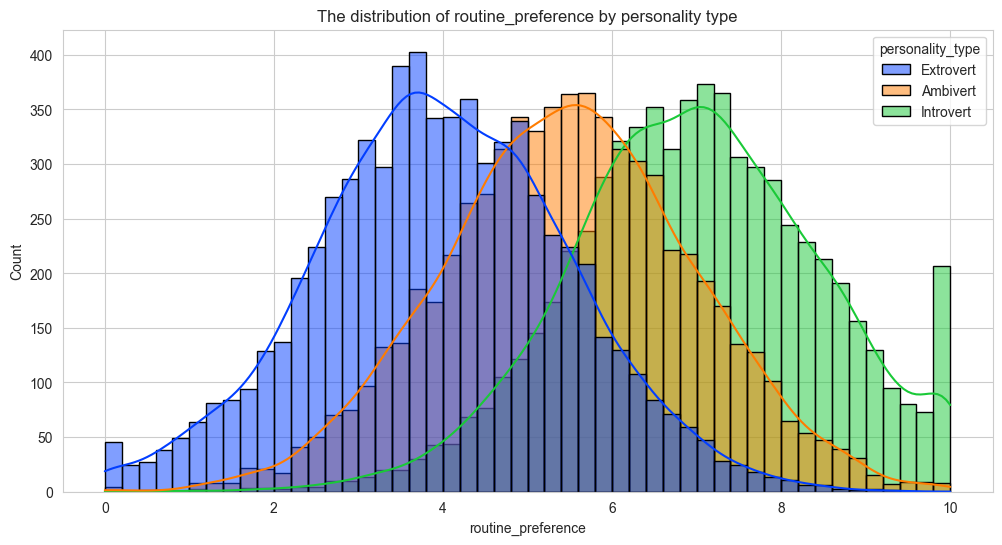

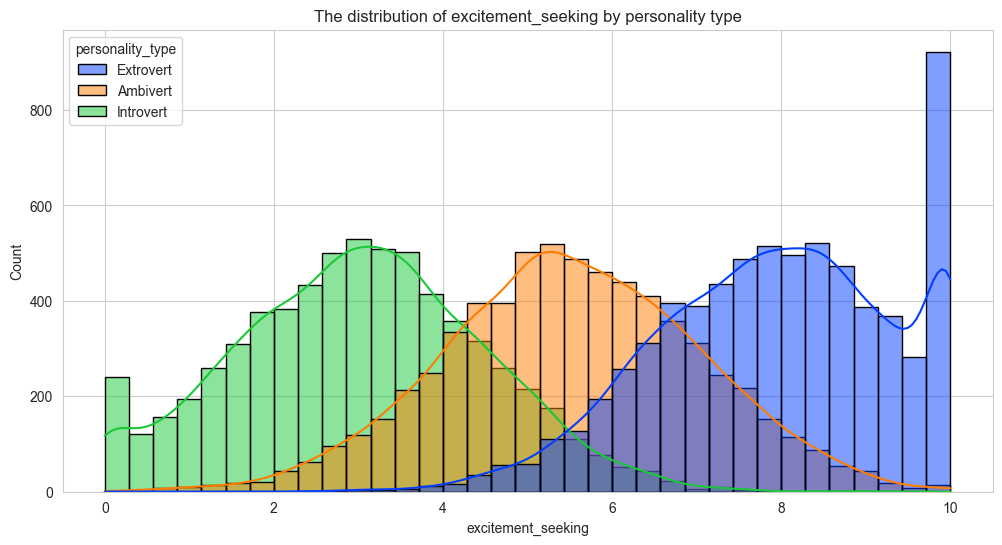

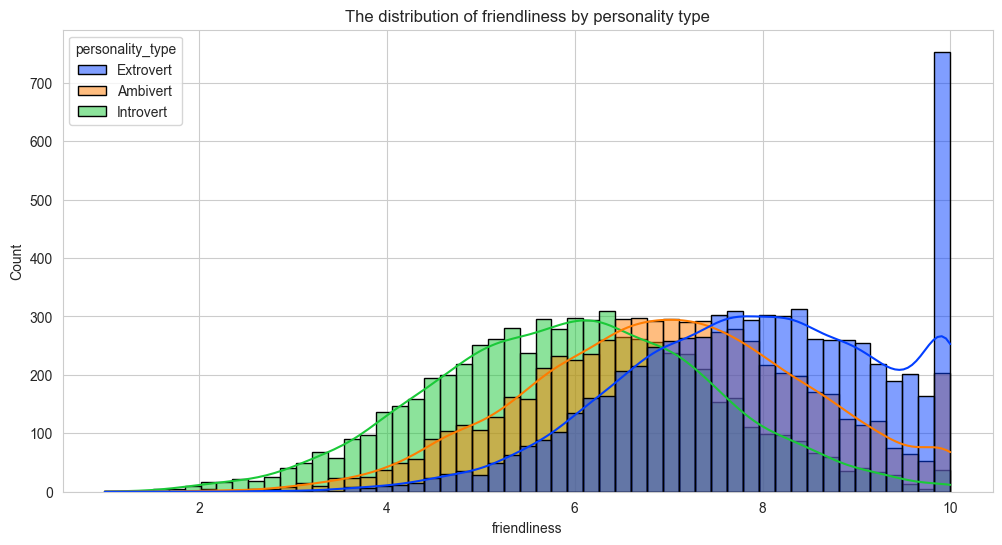

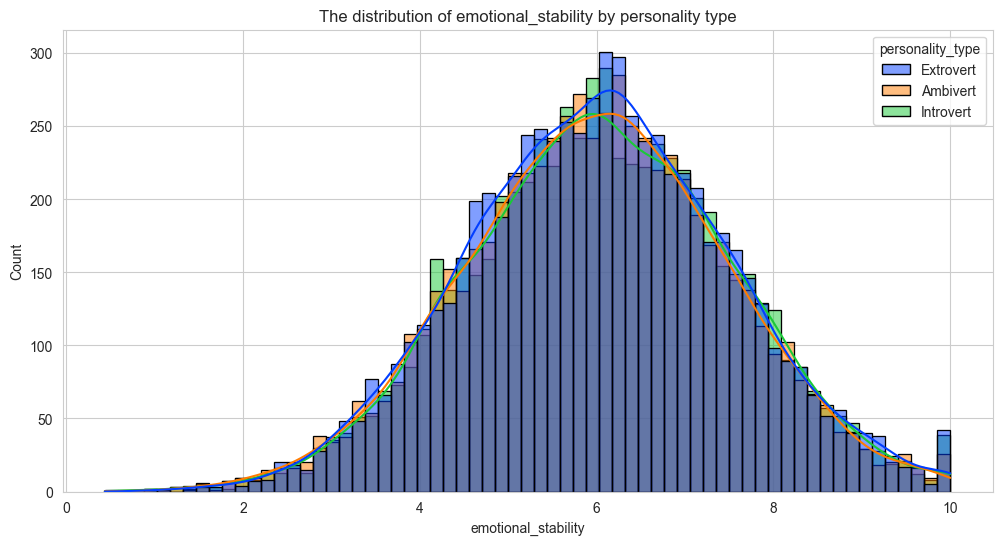

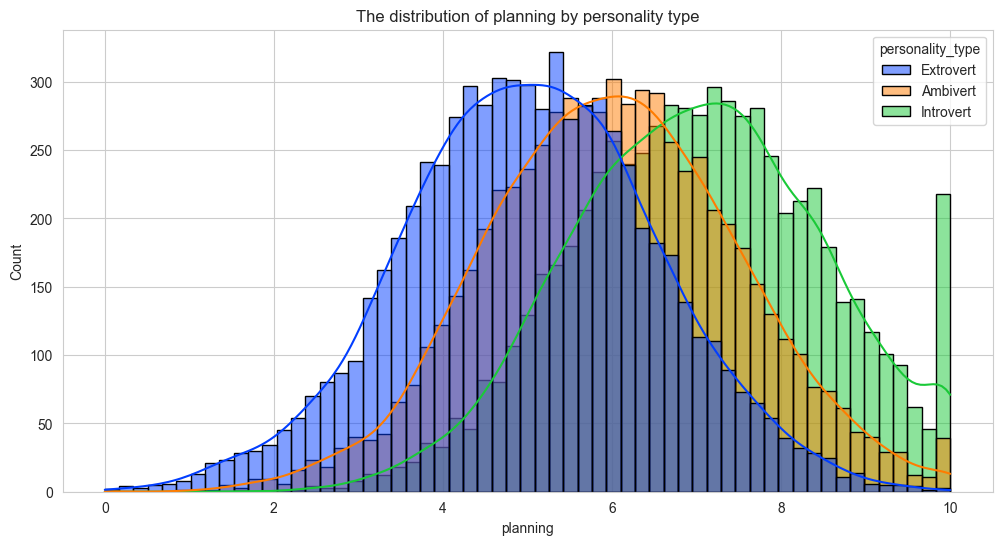

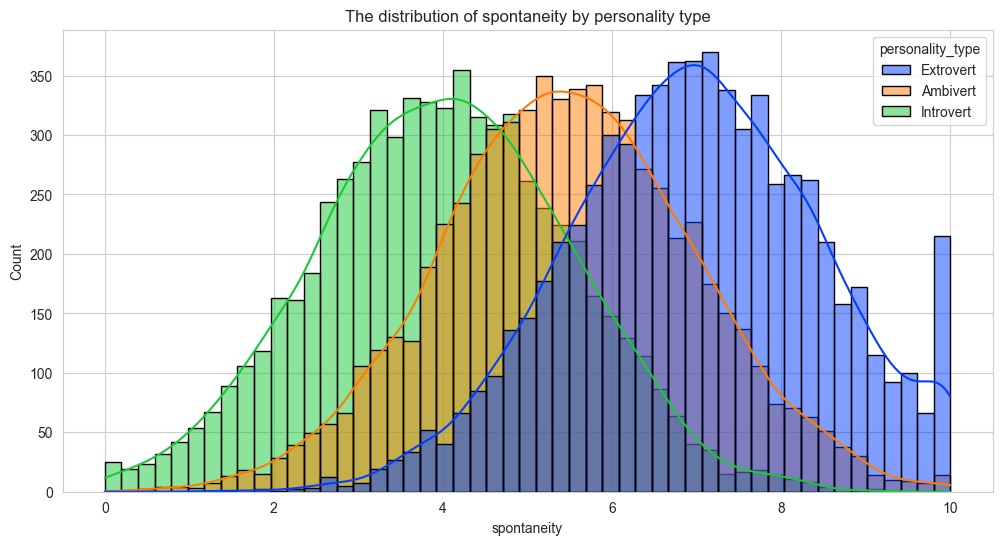

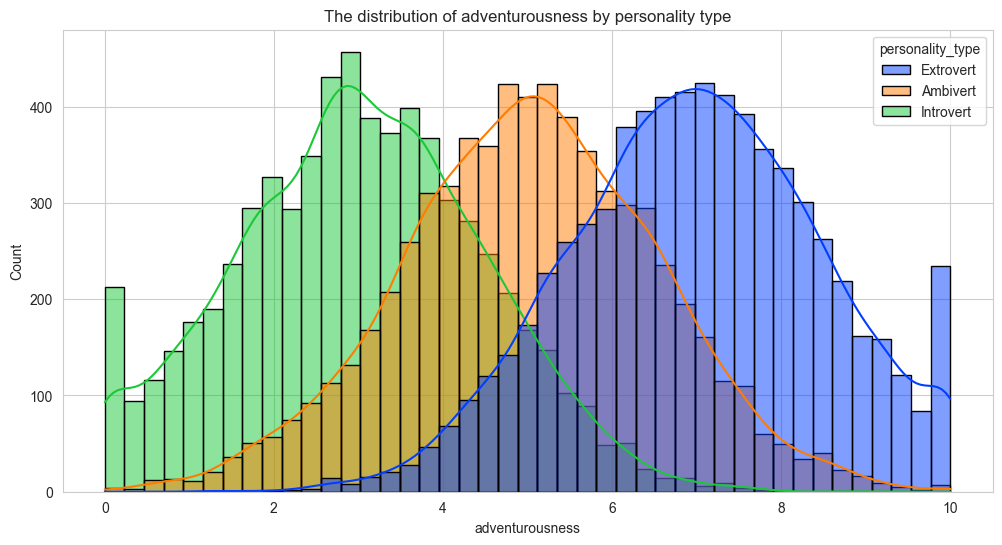

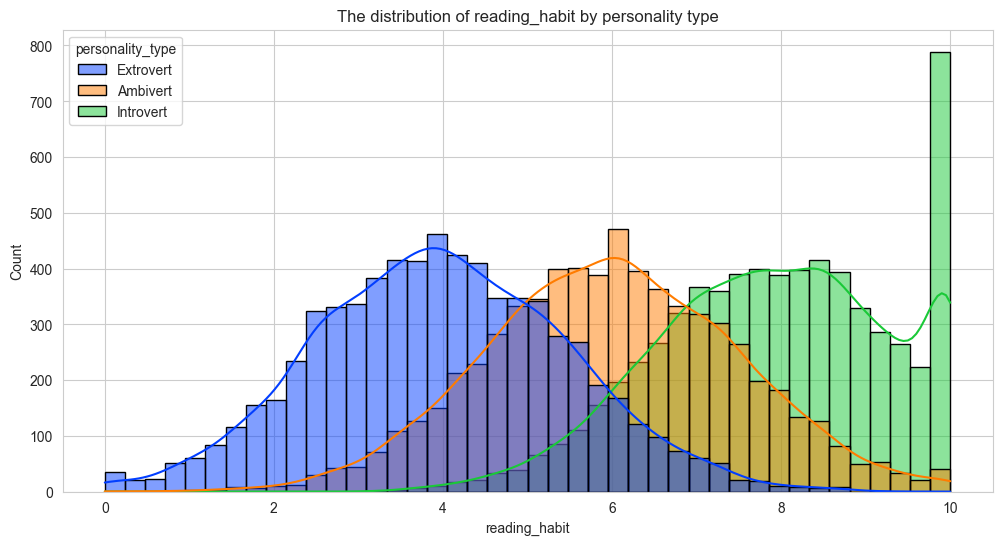

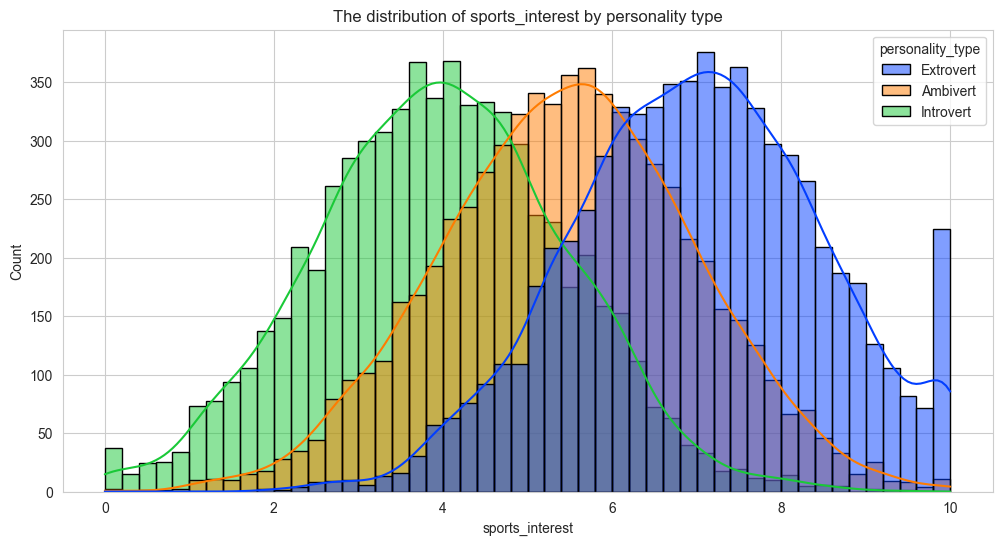

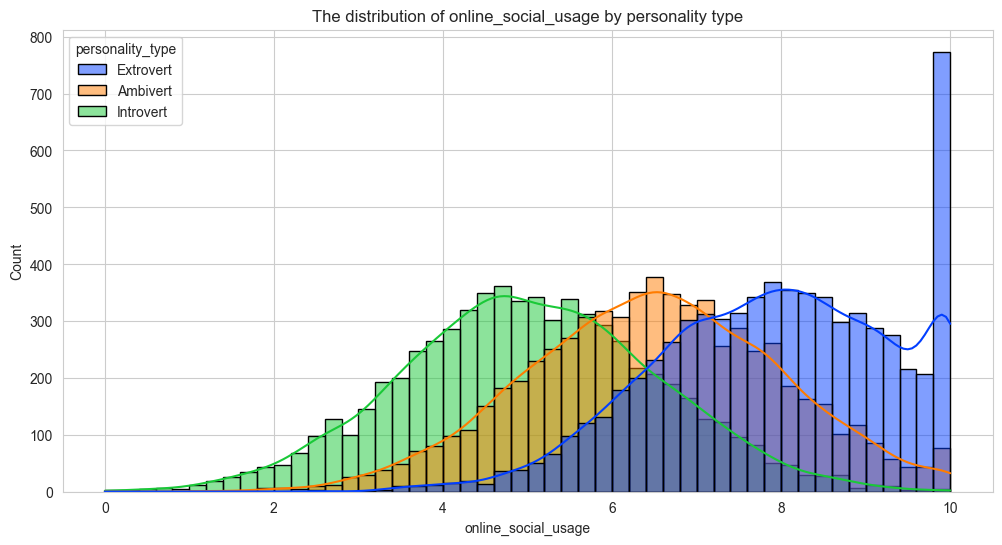

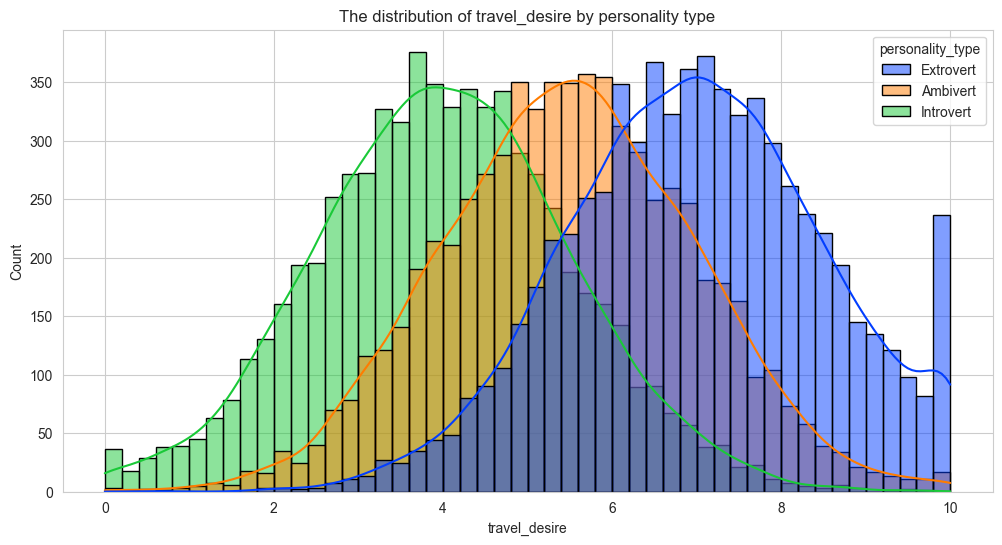

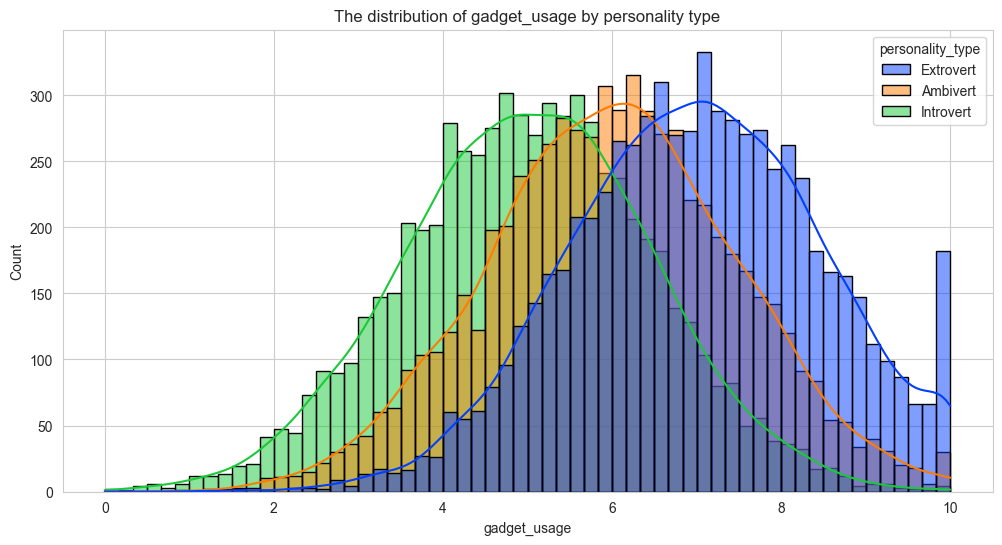

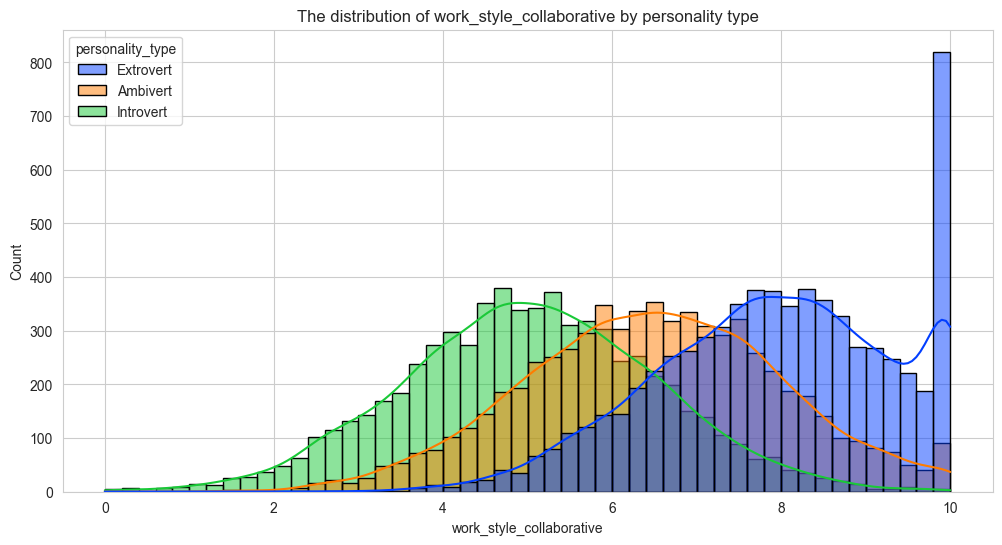

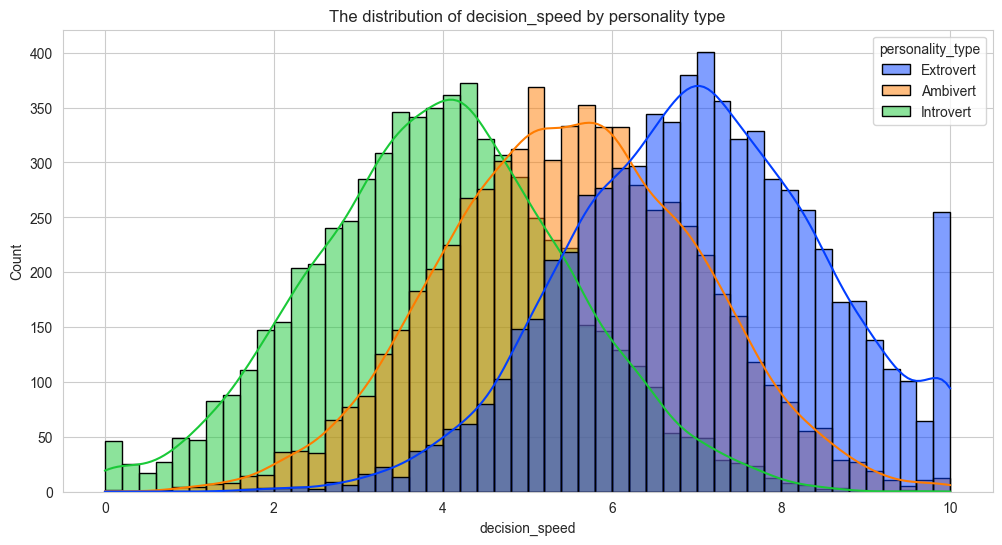

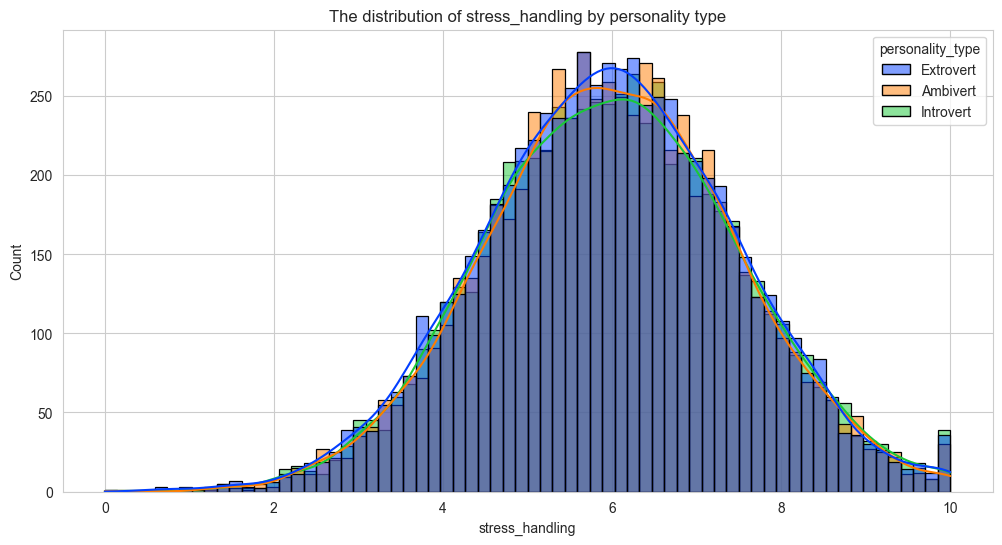

In [188]:
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="personality_type",edgecolor="black",palette="bright")
    plt.title(f"The distribution of {col} by personality type")
    plt.show()

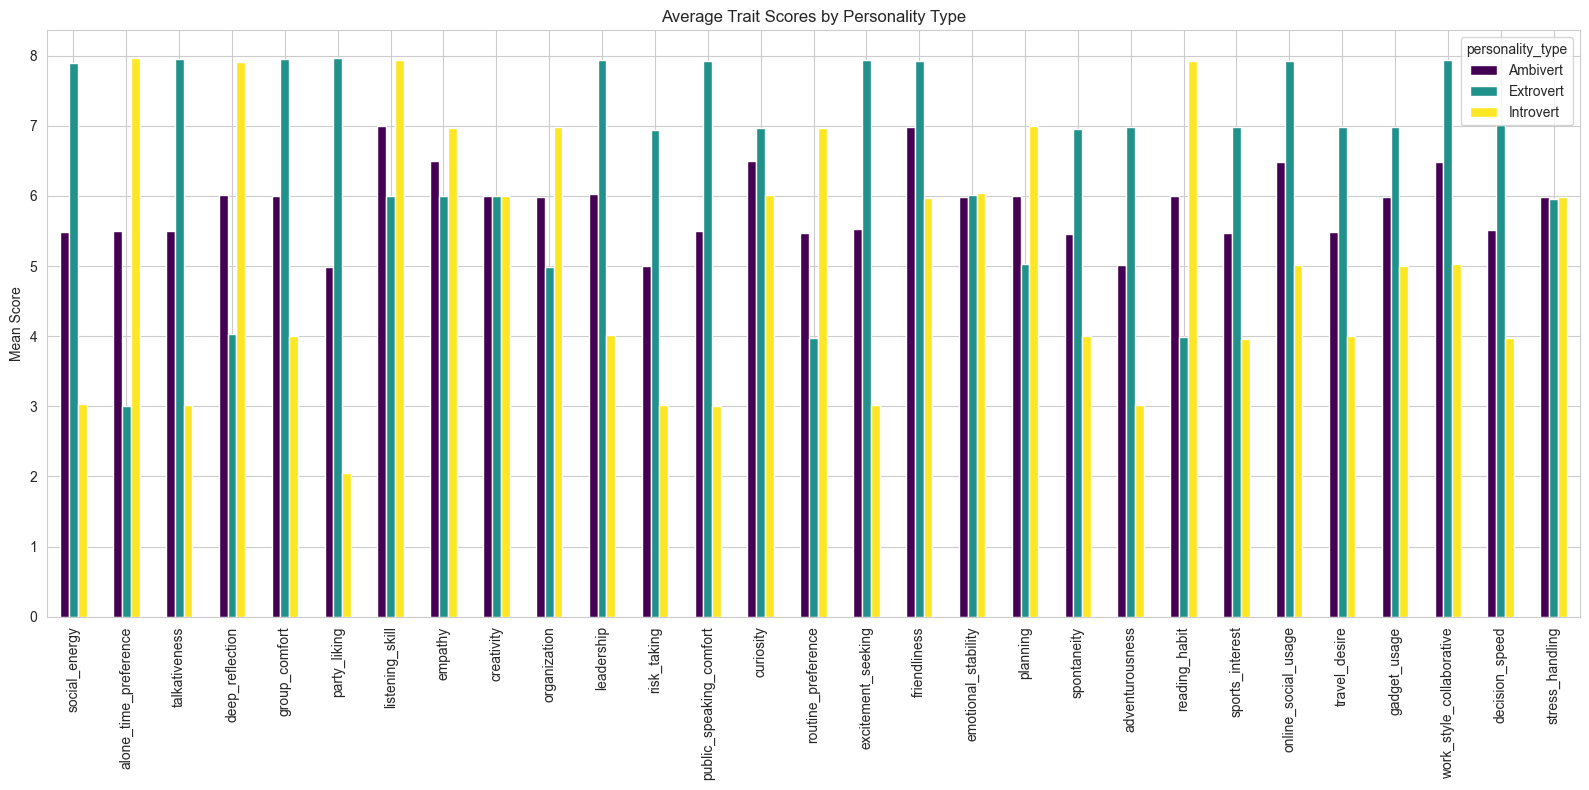

In [189]:
df.groupby("personality_type").mean(numeric_only=True).T.plot(
    kind='bar', figsize=(16,8), colormap='viridis'
)
plt.title("Average Trait Scores by Personality Type")
plt.ylabel("Mean Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Pairplot visualization of some vital variables

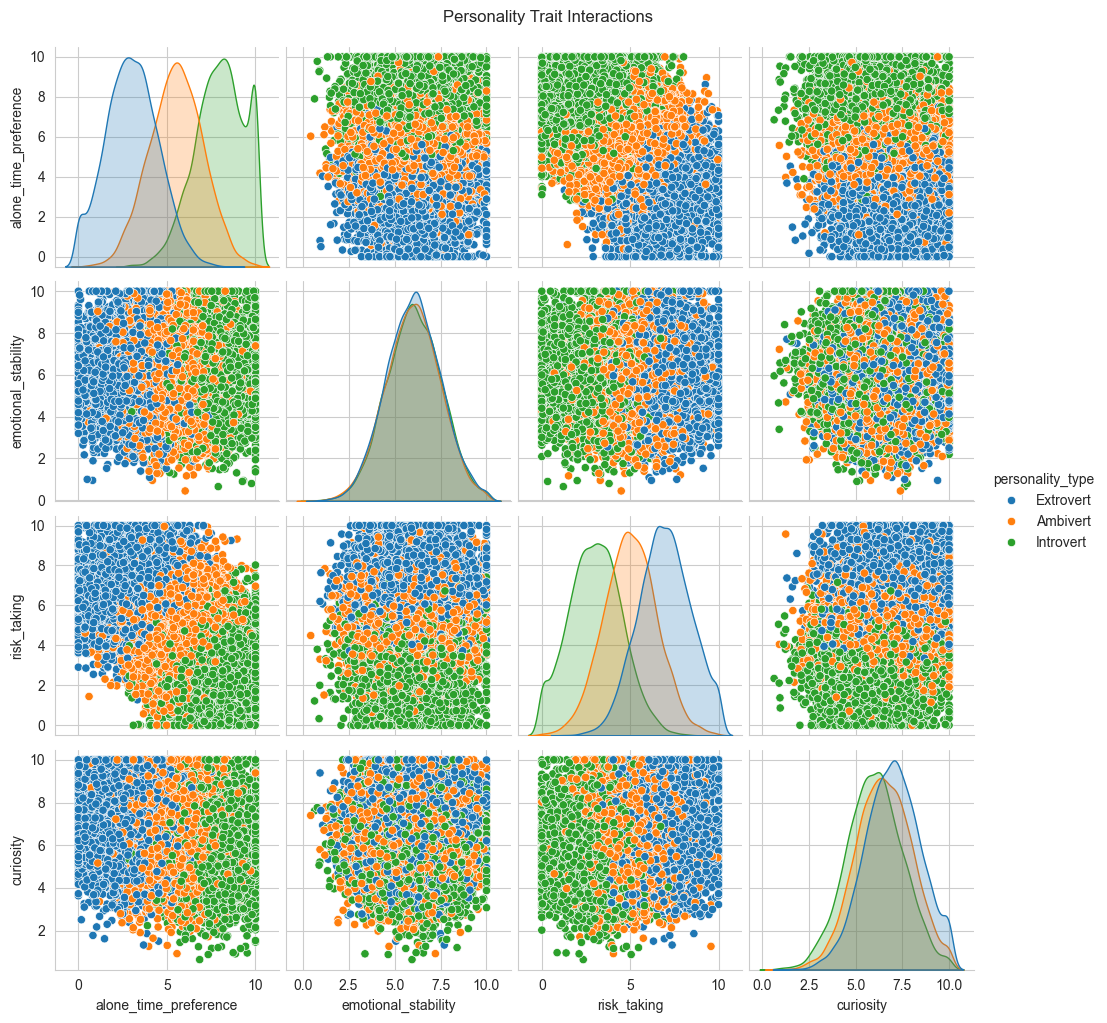

In [190]:
sns.pairplot(df, hue="personality_type", vars=["alone_time_preference", "emotional_stability", "risk_taking", "curiosity"])
plt.suptitle("Personality Trait Interactions", y=1.02)
plt.show()

In [191]:
import plotly.express as px
import pandas as pd

# Group by personality_type and take means
trait_cols = df.columns.drop('personality_type')
mean_traits = df.groupby('personality_type')[trait_cols].mean().reset_index()

# Transpose data for radar chart
melted = mean_traits.melt(id_vars='personality_type', var_name='Trait', value_name='Average')

fig = px.line_polar(melted, r='Average', theta='Trait', color='personality_type',
                    line_close=True, template='plotly_dark', title='Personality Trait Profiles')
fig.update_traces(fill='toself')
fig.show()


In [192]:
fig = px.box(df, x='personality_type', y='talkativeness', color='personality_type',
             title='Talkativeness Across Personality Types')
fig.show()


## Correlation Heatmap

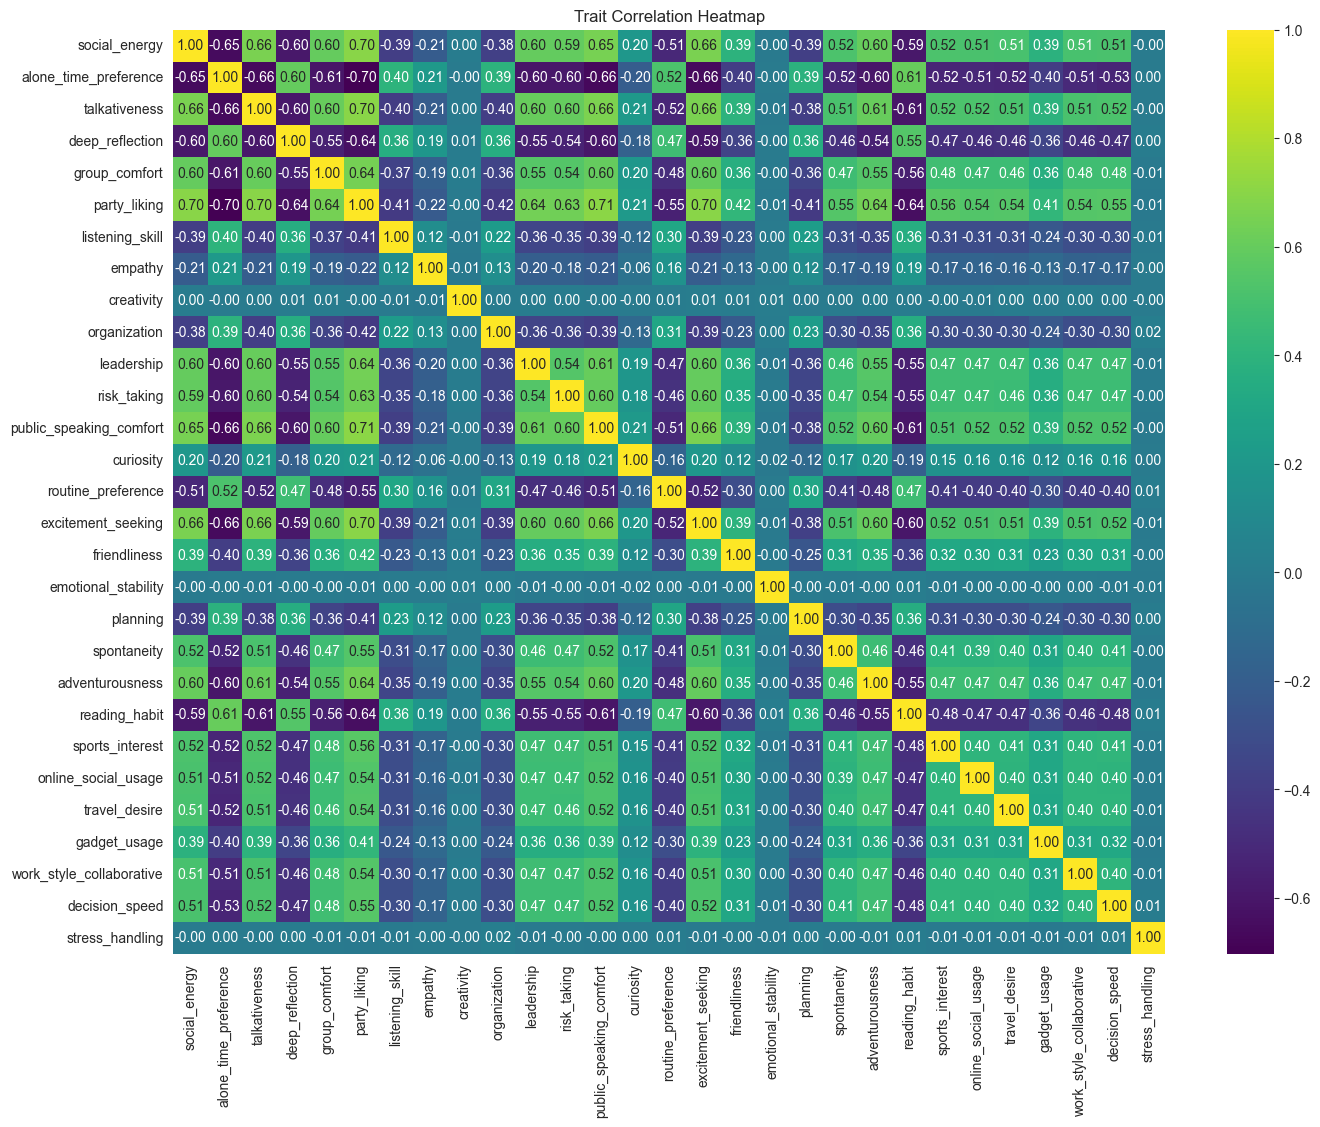

In [193]:
corr = df.drop(columns='personality_type').corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='viridis', annot=True,fmt=".2f")
plt.title("Trait Correlation Heatmap")
plt.show()


# Machine Leanrning 

### Logistic Regression Model 

In [194]:
le=LabelEncoder()
df["personality_type"]=le.fit_transform(df["personality_type"])
# 0=Ambivert 1= EXTROVERT, 2=Introvert

In [195]:
x=df.drop(columns="personality_type")
y=df["personality_type"]

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [197]:
y_pred=model.predict(x_test_scaled)
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.9971666666666666

### RandomForest Classifier Model

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
modelr=RandomForestClassifier(n_estimators=100,random_state=42)
modelr.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [199]:
y_pred=model.predict(x_test)
accr_score=accuracy_score(y_test,y_pred)
accr_score

0.359

In [200]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.359
Confusion Matrix:
 [[   0 1261    0]
 [   0 1426    0]
 [ 399  904   10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1261
           1       0.40      1.00      0.57      1426
           2       1.00      0.01      0.02      1313

    accuracy                           0.36      4000
   macro avg       0.47      0.34      0.19      4000
weighted avg       0.47      0.36      0.21      4000



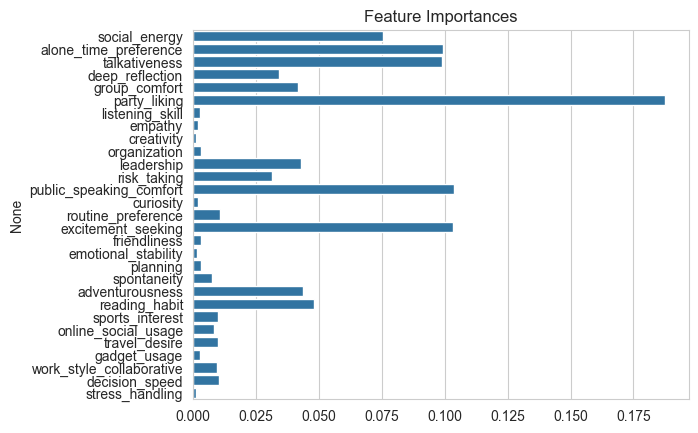

In [201]:
importances = modelr.feature_importances_
feature_names = x.columns

# Plot feature importances
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()


### XGB Classifier Model 

In [202]:
modelx=XGBClassifier()
modelx.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [203]:
y_pred=modelx.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.99375
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1261
           1       1.00      0.99      1.00      1426
           2       0.99      1.00      1.00      1313

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



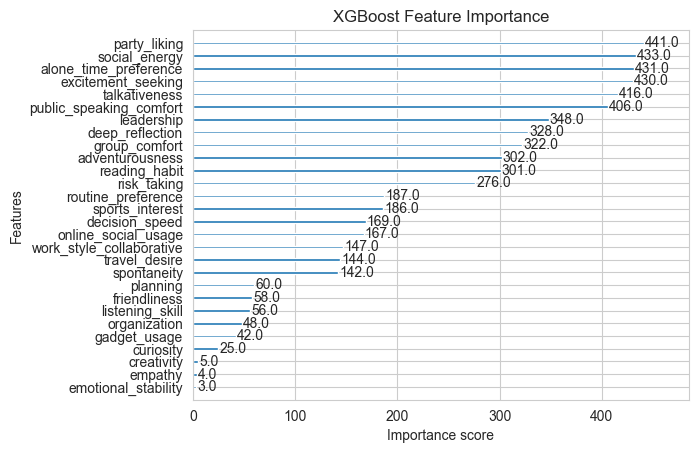

In [204]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(modelx)
plt.title("XGBoost Feature Importance")
plt.show()


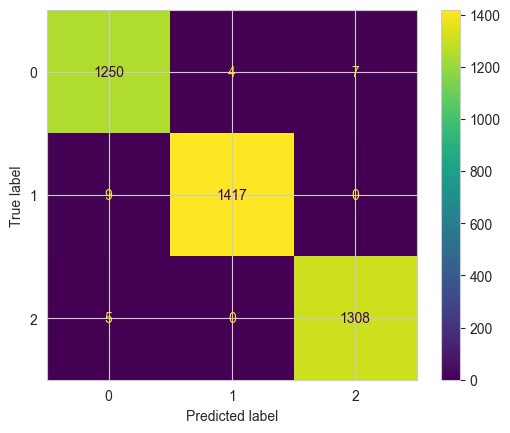

In [205]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


# 🧩 Personality Type Prediction Analysis

> **Unlocking patterns behind human personalities with data-driven insights and machine learning.**

---

## 📌 Overview

This project explores the fascinating world of personality types through data analysis and machine learning. Using a synthetic personality dataset, we aim to uncover patterns, visualize traits, and build predictive models capable of classifying individuals into personality categories based on various behavioral and psychological attributes.

---

## 🚀 Features

- **Exploratory Data Analysis (EDA)**  
  Gain intuitive understanding through charts, distributions, pairplots, heatmaps, and interactive visualizations.

- **Trait Visualization**  
  - Pie charts showing personality type distribution  
  - Radar charts of average trait profiles  
  - Box plots and bar plots to explore specific trait differences

- **Correlation Analysis**  
  Explore relationships among psychological traits with heatmaps.

- **Machine Learning Modeling**  
  - Logistic Regression  
  - Random Forest Classifier  
  - XGBoost Classifier

- **Performance Metrics**  
  Accuracy scores, confusion matrices, and classification reports are used to evaluate the models.

---

## 🗂 Dataset

- **Name**: *Synthetic Personality Traits Dataset*  
- **Source**: Artificially created for educational/analysis purposes  
- **Target**: `personality_type` (Ambivert, Extrovert, Introvert)  
- **Features**:  
  - social_energy  
  - talkativeness  
  - curiosity  
  - risk_taking  
  - emotional_stability  
  - empathy  
  - alone_time_preference  
  - …and more

---

## 📊 Exploratory Highlights

- Distribution plots for all features, segmented by personality type
- Pairplots to show interactions between selected traits
- Radar charts for visually appealing personality profiles
- Correlation heatmaps to understand the interdependence of features

---

## 🤖 Machine Learning

The notebook implements multiple models to predict personality types:

- **Logistic Regression**  
  Provides a baseline classification performance.

- **Random Forest Classifier**  
  Leverages an ensemble of decision trees to improve prediction.

- **XGBoost Classifier**  
  Uses gradient boosting to handle complex patterns.

Feature importance plots help interpret which traits most influence personality predictions.

---

## 📈 Results

The models achieve encouraging accuracy levels on the synthetic dataset, demonstrating that personality traits can be effectively leveraged for classification. Confusion matrices and precision/recall metrics are included for detailed analysis.

